**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de dados de 100 pacientes, afim de prever o cancer de prostata


link dataset: https://www.kaggle.com/sajidsaifi/prostate-cancer





importndo algumas das principais biblioteca como pandas e matplot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import  norm
import seaborn as sns
from scipy.stats import kstest

Atribuir a uma variável o dataset escolhido

In [4]:
df = pd.read_csv('/content/drive/My Drive/Prostate_Cancer.csv')

Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [5]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


#Testes Não Paramétricos

##Teste de Kolmogorov-Smirnov

In [15]:
#definindo amostra
amostra = df.texture

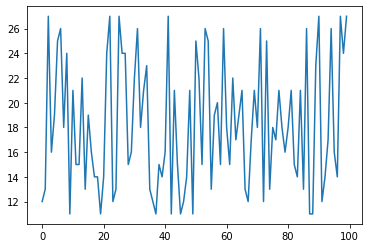

In [16]:
plt.plot(amostra)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


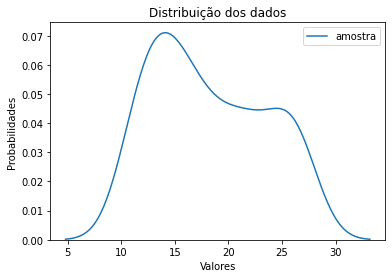

In [17]:
# distribuição de probabilidade comparando a textura media para as duas classes
sns.distplot(amostra, hist=False, rug=False,label='amostra')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

##P-value

* chamado de nível descritivo ou probabilidade de significância
* representa o menor nível de significância com que se rejeita a hipótese nula

In [18]:
s,p = kstest(amostra,'norm')
s,p

(1.0, 0.0)

In [19]:
if p<0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Rejeita H0


#Teste de Wilcoxon para Amostras Independentes

* O Wilcoxon rank-sum test testa a hipótese que duas amostras independentes advém da mesma distriuição
* A hipótese alternativa do teste é que o s valores das amostras advém de distribuições diferentes

In [20]:
from scipy.stats import ranksums

In [21]:
amostra1 = df.texture
amostra2 = df.radius

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


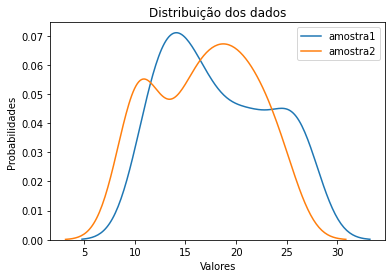

In [22]:
# distribuição de probabilidade comparando a textura media para as duas classes
sns.distplot(amostra1, hist=False, rug=False,label='amostra1')
sns.distplot(amostra2, hist=False, rug=False,label='amostra2')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [24]:
s,p = ranksums(amostra1,amostra2)
s,p

(1.7409145820773495, 0.08169855226894107)

In [25]:
if p<0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Falha em Rejeitar H0


In [26]:
amostra3 = df.perimeter
amostra4 = df.area

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


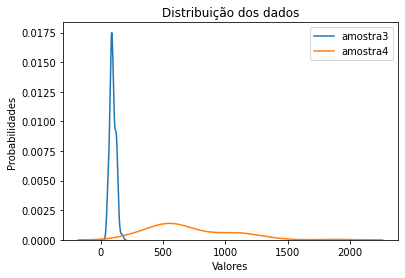

In [28]:
# distribuição de probabilidade comparando a textura media para as duas classes
sns.distplot(amostra3, hist=False, rug=False,label='amostra3')
sns.distplot(amostra4, hist=False, rug=False,label='amostra4')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [29]:
s,p = ranksums(amostra3,amostra4)
s,p

(-12.216944435630522, 2.5239394239903128e-34)

In [30]:
if p<0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Rejeita H0


##Teste de Wilcoxon para Amostras Dependentes

* O Wilcoxon signed-rank teste testa a hipótese que duas amostras dependentes advém da mesma distribuição
* A hipótese alternativa do teste é que os valores das amostras advém de distribuições diferentes

In [31]:
from scipy.stats import wilcoxon

In [32]:
amostra5 = df.compactness
amostra6 = df.symmetry

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


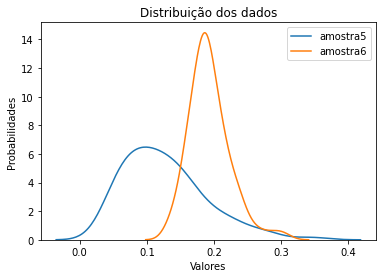

In [33]:
# distribuição de probabilidade comparando a textura media para as duas classes
sns.distplot(amostra5, hist=False, rug=False,label='amostra5')
sns.distplot(amostra6, hist=False, rug=False,label='amostra6')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [34]:
s,p = wilcoxon(amostra5,amostra6)
s,p

(151.0, 4.998030370228504e-16)

In [35]:
if p<0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Rejeita H0


##Teste de Friedman

* Em alguns casos precisamos de um teste não-paramétrico para comparar mais de duas amostras
* O teste de Friedman permite fazer esse tipo de comparação
* A hipótese nula é que todas as amostras têm a mesma distribuição
* A hipótese alternativa é que pelo menos uma das amostras não segue a mesma distribuição das demais

In [36]:
from scipy.stats import friedmanchisquare

In [38]:
amostra9 = df.smoothness
amostra10 = df.compactness
amostra11 = df.symmetry

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

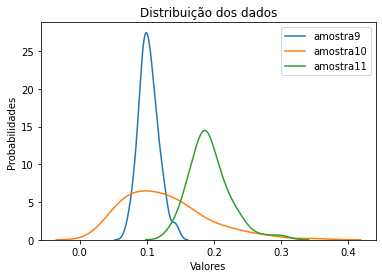

In [39]:
# distribuição de probabilidade comparando a textura media para as duas classes
sns.distplot(amostra9, hist=False, rug=False,label='amostra9')
sns.distplot(amostra10, hist=False, rug=False,label='amostra10')
sns.distplot(amostra11, hist=False, rug=False,label='amostra11')
plt.xlabel('Valores')
plt.ylabel('Probabilidades')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [40]:
s,p = friedmanchisquare(amostra9,amostra10,amostra11)
s,p

(129.4786967418546, 7.656992831282869e-29)

In [41]:
if p<0.05:
  print('Rejeita H0')
else:
  print('Falha em Rejeitar H0')

Rejeita H0


##Teste de Nemenyi

  * comparação entre pares de modo a verificar qual dos pares diferem entre si


In [42]:
! pip install scikit-posthocs

In [44]:
from scikit_posthocs import posthoc_nemenyi

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
post = posthoc_nemenyi([amostra9,amostra10,amostra11])
post

,1,2,3
1,1.000000e+00,1.862077e-02,1.118919e-30
2,1.862077e-02,1.000000e+00,5.192946e-18
3,1.118919e-30,5.192946e-18,1.000000e+00


In [46]:
for i in range(len(post)):
  for j in range(i+1,len(post)):
    if post.iloc[i,j]<0.05:
      print('amostras',i,'e',j,'são diferentes')
    else:
      print('amostras',i,'e',j,'são iguais')

amostras 0 e 1 são diferentes
amostras 0 e 2 são diferentes
amostras 1 e 2 são diferentes
